**Import the required libraries**

In [128]:
import tensorflow as tf
from tensorflow import keras

from matplotlib import pyplot as plt
import seaborn as sn

import numpy as np

**Load the Dataset**

In [85]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

**MNIST Dataset downloaded and locally cached at ~/.keras/datasets**

In [86]:
!ls ~/.keras/datasets

mnist.npz


**Size of Training and Testing Dataset and right aligned it.**
:>6 (means digit will take 6 places in total and will align to right)
:>7 (means digit will take 7 places in total and will aign to right)

In [87]:
print(f"Length of Training Dataset{len(X_train):>6}")
print(f"Length of Testing Dataset{len(X_test):>7}")

Length of Training Dataset 60000
Length of Testing Dataset  10000


**Shape and dimenion of single Image**

In [88]:
print(f"Shape of Single Image {X_train[0].shape}")
print(f"Dimenstion of Single Image {X_train[0].ndim}")
print(f"Type of Single Image {type(X_train[0])}")
print(f"Type of Input Data {type(X_train)}")

Shape of Single Image (28, 28)
Dimenstion of Single Image 2
Type of Single Image <class 'numpy.ndarray'>
Type of Input Data <class 'numpy.ndarray'>


**Check the values of 1 Image array values** 
0 - means Black ; 255 means White

In [89]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

**Scale the array by dividing array with 255. So all values of array will be in range 0 to 1**

In [90]:
X_train = X_train/255
X_test = X_test/255

In [91]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

**Look at First five Image**

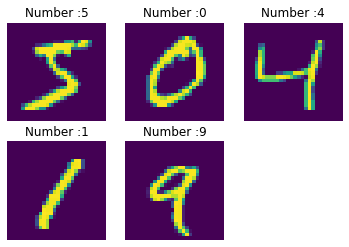

In [92]:
for i in range(5):
  plt.subplot(2,3,i+1)
  plt.imshow(X_train[i])
  title = "Number :"+ str(y_train[i])
  plt.title(title)
  plt.axis("off")
plt.show()

**Flatten the Input 2D array and check the flatten shape and dimension**

In [93]:
print(f"Shape of X_train:{X_train.shape}")

Shape of X_train:(60000, 28, 28)


In [94]:
X_train_flatten = X_train.reshape(len(X_train), X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test.reshape(len(X_test), X_test.shape[1]*X_test.shape[2])

In [95]:
print(f"Shape of X_train_flatten array:{X_train_flatten.shape}")
print(f"Shape of X_test_flatten array:{X_test_flatten.shape}")

Shape of X_train_flatten array:(60000, 784)
Shape of X_test_flatten array:(10000, 784)


In [96]:
print(f"Shape of 1 flatten image {X_train_flatten[0].shape}")
print(f"Dimension of 1 flatten image {X_train_flatten[0].ndim}")

Shape of 1 flatten image (784,)
Dimension of 1 flatten image 1


**Create a Simple Neural Network One Input Layer and One Output Layer**

Input Layer has 784 Neurons (equal to number of features)
Output Layer has 10 Neurons (equal to number of labels)

In [97]:
model = keras.Sequential([keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')])

**Visualize the Keras Model**

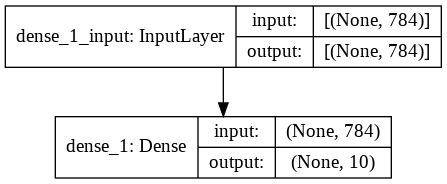

In [144]:
keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True
)

**Compile the Model**

In [98]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

**Fit the model**

In [99]:
model.fit(X_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7063 - accuracy: 0.8191
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3079 - accuracy: 0.9146
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2876 - accuracy: 0.9189
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2705 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2611 - accuracy: 0.9269


**Find accuracy on Test DataSet**

In [100]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 0s 991us/step - loss: 0.2671 - accuracy: 0.9264


[0.26711806654930115, 0.9264000058174133]

**Draw and Predict 2-3 Images only**

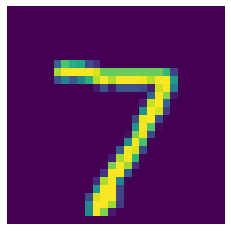

In [105]:
plt.imshow(X_test[0])
plt.axis("off")
plt.show()

In [120]:
test_predictions = model.predict(X_test_flatten)
test_predictions[0]

array([3.2260656e-02, 4.4254068e-07, 8.1206769e-02, 9.3818992e-01,
       3.1863451e-03, 1.2252417e-01, 1.7277690e-06, 9.9983466e-01,
       9.0474099e-02, 7.1253186e-01], dtype=float32)

In [121]:
test_predictions_label = [i.argmax() for i in test_predictions]

7

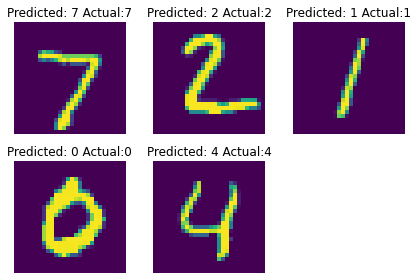

In [122]:
for i in range(5):
  plt.subplot(2,3,i+1)
  plt.imshow(X_test[i])
  title = "Predicted: "+str(test_predictions_label[i])+" Actual:"+str(y_test[i])
  plt.title(title)
  plt.axis("off")
  plt.tight_layout()
plt.show()

**Confusion Matrix**

Computes the confusion matrix between predictions and actual labels

Row - represents the actual Labels
Column - represents the predicted Labels

In [127]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=test_predictions_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    1,    0,    5,    5,    3,    1,    0],
       [   0, 1113,    4,    1,    0,    1,    4,    2,   10,    0],
       [   7,    6,  938,   12,    9,    4,   12,   12,   29,    3],
       [   4,    0,   25,  905,    0,   31,    2,   14,   21,    8],
       [   2,    1,    6,    0,  921,    0,    9,    4,    8,   31],
       [  10,    3,    3,   26,   11,  785,   15,    8,   26,    5],
       [  14,    3,    7,    1,    7,   12,  911,    2,    1,    0],
       [   1,    5,   24,    2,    8,    0,    0,  961,    2,   25],
       [  10,    7,   10,   17,    9,   32,    9,   13,  857,   10],
       [  11,    7,    1,   10,   31,    7,    0,   29,    4,  909]],
      dtype=int32)>

As we have 10 Classes to 10*10 matrix

Row 1 : 

Actual 0 

But 

964 images of '0' has been predicted as 0

1 images of '0' has been predicted as 2

1 image of '0' has been predicted as 3

5 images of '0' has been predicted as 5

5 images of '0' has been predicted as 6

3 images of '0' has been predicted as 7

1 image of '0' has been predicted as 1


**Plot or Visualize the Confusion Matrix**

annot = True (i.e. show the numbers of matrix)

fmt = 'd' (i.e. show the number in decimal format)

Text(69.0, 0.5, 'Actual')

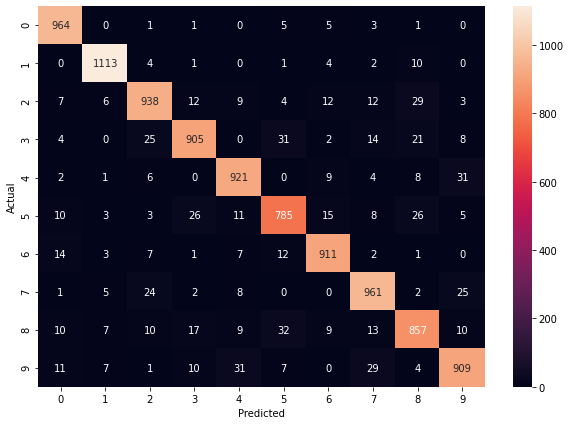

In [134]:
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")